In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')

df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df['duration'] >= 10) & (df['duration'] <= 60)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
9,2,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.0,225,265,1.0,12.19,38.00,...,0.5,2.75,0.00,None,0.3,42.05,1.0,1.0,0.0,34.033333
10,2,2021-01-01 00:31:14,2021-01-01 00:55:07,N,1.0,244,244,2.0,3.39,18.00,...,0.5,0.00,0.00,None,0.3,19.30,2.0,1.0,0.0,23.883333
11,2,2021-01-01 00:08:50,2021-01-01 00:21:56,N,1.0,75,213,1.0,6.69,19.50,...,0.5,0.00,0.00,None,0.3,20.80,2.0,1.0,0.0,13.100000
13,2,2021-01-01 00:39:57,2021-01-01 00:55:25,N,1.0,74,60,1.0,5.48,18.00,...,0.5,0.00,0.00,None,0.3,19.30,2.0,1.0,0.0,15.466667
16,2,2021-01-01 00:32:07,2021-01-01 00:42:54,N,1.0,74,116,1.0,2.08,9.50,...,0.5,2.16,0.00,None,0.3,12.96,1.0,1.0,0.0,10.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [ ]:
# cats = df[['VendorID','PULocationID','DOLocationID']]
# nums = df.drop(cats, axis=1)
# nums = nums.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1)

In [3]:
df['delta'] = (df['total_amount'] - df['fare_amount'] - df['extra'] - df['mta_tax'] - df['tip_amount'] - df['tolls_amount'] - df['improvement_surcharge']).round(2)

In [4]:
df['extra'] = df['extra'] + df['delta']

In [5]:
df = df.drop(['total_amount', 'delta'], axis=1)

In [6]:
df = df[df['fare_amount']>=0]

In [7]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [8]:
df['is_weekend'] = (df['lpep_pickup_datetime'].dt.day_of_week).isin([5,6])

In [9]:
df['day_no'] = df['lpep_pickup_datetime'].dt.day

In [10]:
df = df.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'], axis=1)

In [11]:
df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)

In [12]:
# ignoring columns with missing values
df = df.drop(['ehail_fee','store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge','PULocationID','DOLocationID'], axis=1)

In [13]:
X = df.drop('duration', axis=1)
y = df['duration']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


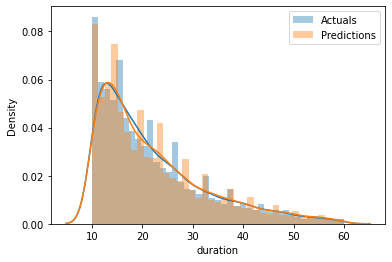

In [27]:
sns.distplot(y_test, label='Actuals')
sns.distplot(preds, label='Predictions')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import  r2_score, mean_squared_error
RMSE = mean_squared_error(y_test, preds, squared=False)
R2_Score = r2_score(y_test, preds)
Avg_duration = np.mean(y)
med_duration = np.median(y)

In [20]:
print('Avg. Duration:', Avg_duration)
print('Med. Duration:', med_duration)
print(y.describe(), '\n')
print('RMSE:', RMSE)
print('R2 Score:', R2_Score)

Avg. Duration: 22.02721510057643
Med. Duration: 19.0
count    49614.000000
mean        22.027215
std         10.738424
min         10.000000
25%         13.816667
50%         19.000000
75%         27.666667
max         60.000000
Name: duration, dtype: float64 

RMSE: 7.058545313167152
R2 Score: 0.5668110712469074
